In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pandas as pd

In [2]:
df = pd.read_csv('bank_cleaned.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [3]:
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [4]:
df.isnull().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [6]:
df['response'].value_counts()  #response is instead of 'y' column

no     36202
yes     4639
Name: response, dtype: int64

In [7]:
df_update= df.copy()
df_update

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1


In [8]:
#dividing age in 5 parts
a1=df_update[(df_update['age']>=18) & (df_update['age']<=28)]
a2=df_update[(df_update['age']>=29) & (df_update['age']<=39)]
a3=df_update[(df_update['age']>=40) & (df_update['age']<=50)]
a4=df_update[(df_update['age']>=51) & (df_update['age']<=60)]
a5=df_update[(df_update['age']>=61)]

In [9]:
total=[]
list1=[a1,a2,a3,a4,a5]
for i in list1:
  total.append(i.shape[0])
yes_count=[]
for i in list1:
  yes_count.append(i[i['response']=='yes'].count()['response'])

In [10]:
age_final=pd.DataFrame()
age_final['Age Groups']=['18-28','29-39','40-50','51-60','61+']
age_final['Total']=total
age_final['Yes Count']=yes_count
age_final['Percetage']=(age_final['Yes Count']/age_final['Total'])*100
age_final.sort_values(by='Percetage',ascending=False)

,Age Groups,Total,Yes Count,Percetage
4,61+,979,420,42.900919
0,18-28,3660,652,17.814208
1,29-39,17651,1871,10.599966
3,51-60,7174,706,9.841093
2,40-50,11377,990,8.701767


In [28]:
#Age groups 18-28 and 61+ age are the two groups who have higher Term Deposit Subscription rate as compared to other age groups
#Rate of subscription is very less for the age group 40-50

In [11]:
#Marital status
df_married=df_update[df_update['marital']=='married']
df_single=df_update[df_update['marital']=='single']
df_divorced=df_update[df_update['marital']=='divorced']
married=df_update['marital'].value_counts().to_frame()
married


,marital
married,24641
single,11443
divorced,4757


In [12]:
yes_count=[]
yes_count.append(df_married[df_married['response']=='yes'].count()[1])
yes_count.append(df_single[df_single['response']=='yes'].count()[1])
yes_count.append(df_divorced[df_divorced['response']=='yes'].count()[1])
married['Subscription count']=yes_count

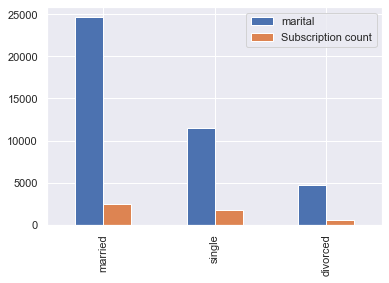

In [13]:
married.plot(kind='bar')

In [14]:
married['Percentage']=(married['Subscription count']/married['marital'])*100
married.sort_values(by='Percentage',ascending=False)

,marital,Subscription count,Percentage
single,11443,1674,14.629031
divorced,4757,552,11.603952
married,24641,2413,9.792622


In [15]:
#As per the visualization marital & response (y columns) don't have a strong relationship

In [16]:
#Education
education=df_update['education'].value_counts().to_frame()
education

,education
secondary,21933
tertiary,12380
primary,6528


In [17]:
df_secondary=df_update[df_update['education']=='secondary']
df_tertiary=df_update[df_update['education']=='tertiary']
df_primary=df_update[df_update['education']=='primary']
df_unknown=df_update[df_update['education']=='unknown']

In [18]:
yes_count=[]
yes_count.append(df_secondary[df_secondary['response']=='yes'].count()[1])
yes_count.append(df_tertiary[df_tertiary['response']=='yes'].count()[1])
yes_count.append(df_primary[df_primary['response']=='yes'].count()[1])

education['Subscription count']=yes_count

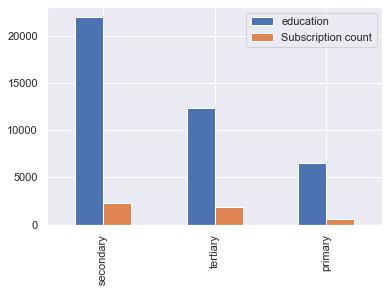

In [19]:
education.plot(kind='bar')

In [20]:
education['Percentage']=(education['Subscription count']/education['education'])*100
education.sort_values(by='Percentage',ascending=False)

,education,Subscription count,Percentage
tertiary,12380,1813,14.644588
secondary,21933,2279,10.390735
primary,6528,547,8.379289


In [21]:
#columns education & response don't have strong relationship

In [22]:
#Job type
df_update['job'].value_counts()

blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64

In [23]:
df_update['job'].value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'other'],
      dtype='object')

In [24]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df_update['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=df_update[df_update['job']==i]
  title.append(i)
  total_count_in_each_group.append(df_job.shape[0])
  yes_count.append(df_job[df_job['response']=='yes'].count()['response'])
  no_count.append(df_job[df_job['response']=='no'].count()['response'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs

,Job Title,Total,Yes,No
0,blue-collar,8805,637,8168
1,management,8565,1125,7440
2,technician,6954,754,6200
3,admin.,4705,563,4142
4,services,3801,332,3469
5,retired,2020,448,1572
6,self-employed,1443,162,1281
7,entrepreneur,1340,109,1231
8,unemployed,1212,190,1022
9,housemaid,1149,101,1048


([<matplotlib.axis.XTick at 0x17e547fe8c8>,
 <a list of 12 Text xticklabel objects>)

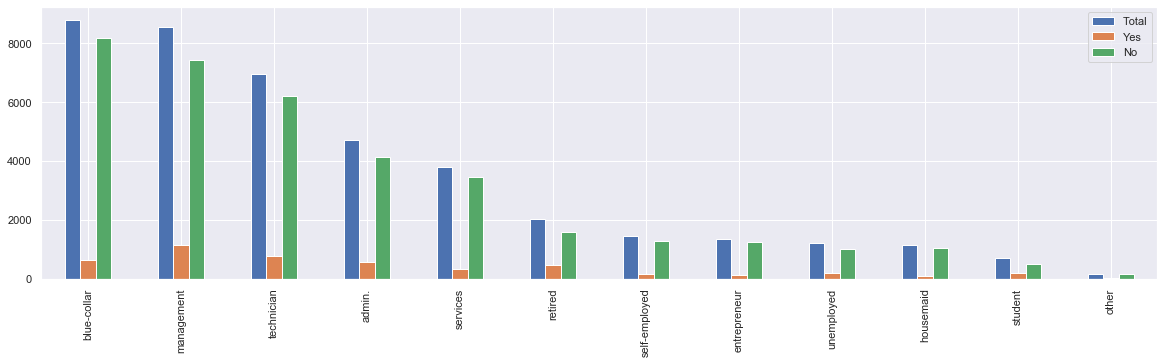

In [25]:
labels=df_jobs['Job Title']
positions = np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

In [26]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final

,Job Title,Percentage_yes,Percentage_no
10,student,29.462990,70.537010
5,retired,22.178218,77.821782
8,unemployed,15.676568,84.323432
1,management,13.134851,86.865149
3,admin.,11.965994,88.034006
6,self-employed,11.226611,88.773389
2,technician,10.842680,89.157320
11,other,9.493671,90.506329
9,housemaid,8.790252,91.209748
4,services,8.734544,91.265456


([<matplotlib.axis.XTick at 0x17e55ac0908>,
 <a list of 12 Text xticklabel objects>)

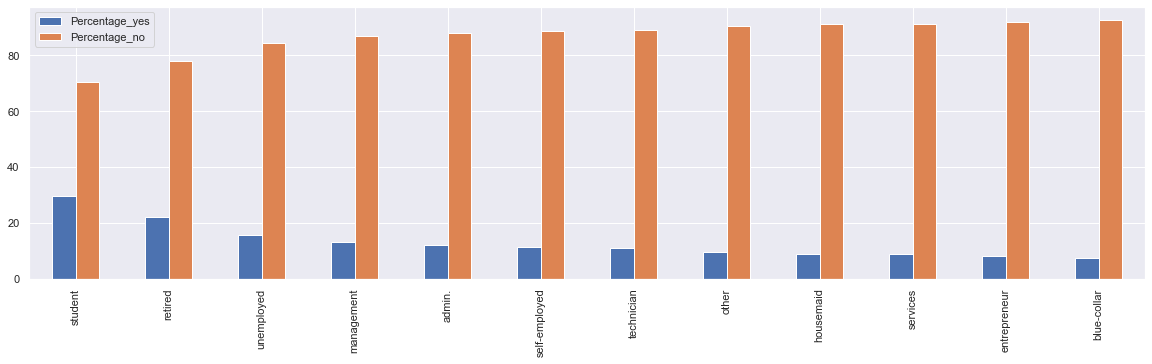

In [27]:
labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

In [28]:
#From the above graph we can see that students and retired people are the clients who have high percentage of subscription rate.
#Blue-collar,entrepreneur,housemaid,services have low are few jobs that have low subscription rate.
#People with job description as 'Blue-collar' are the most contacted people
#Students are the less contacted people

In [29]:
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [30]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student', 'other'], dtype=object)

In [31]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [32]:
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [33]:
df.groupby('marital').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
marital,,,,,,,,,
divorced,21120.482447,45.588606,926.490015,15.885852,4.373469,2.633382,32.387219,0.396679,0.116040
married,21329.800252,43.157705,1115.902074,15.900572,4.224499,2.854998,31.061686,0.424699,0.097926
single,23831.933147,33.699030,1045.026217,15.774972,4.463980,2.658569,34.745783,0.479507,0.146290


In [34]:
df.groupby('job').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
job,,,,,,,,,
admin.,22624.120935,39.062274,944.721360,15.615090,4.097401,2.573220,39.179809,0.513709,0.119660
blue-collar,19045.821579,39.954685,950.183419,15.475071,4.407346,2.799091,34.177626,0.361272,0.072345
entrepreneur,20846.844030,41.882090,1032.443284,15.787313,4.243254,2.811194,27.766418,0.378358,0.081343
housemaid,21188.475196,46.219321,1012.594430,16.006092,4.132707,2.838120,18.476936,0.293299,0.087903
management,23480.160771,40.265382,1269.056743,16.176532,4.232542,2.902160,31.254057,0.500642,0.131349
other,22326.284810,45.943038,1540.841772,15.006329,3.793418,3.316456,23.240506,0.417722,0.094937
retired,26751.383663,61.140099,1486.372277,15.496040,4.740173,2.364356,33.107426,0.543564,0.221782
self-employed,22544.647956,40.325710,1180.018018,16.108801,4.483368,2.916147,26.803881,0.389466,0.112266
services,20202.390160,38.681926,865.224678,15.617732,4.312289,2.705867,32.729019,0.368324,0.087345


In [35]:
df.groupby('education').mean()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
education,,,,,,,,,
primary,19855.623621,45.790288,1069.766391,15.477022,4.257174,2.840993,28.493413,0.347120,0.083793
secondary,21390.207951,39.992158,967.081703,15.820088,4.324241,2.710847,33.711166,0.424566,0.103907
tertiary,24232.440388,39.569063,1265.593942,16.144750,4.309159,2.851050,31.636591,0.505735,0.146446


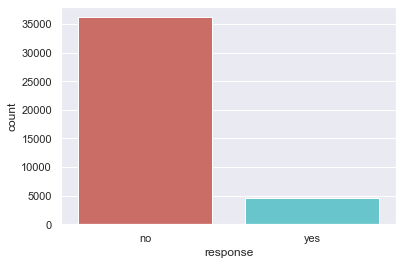

<Figure size 432x288 with 0 Axes>

In [36]:
sns.countplot(x='response', data=df_update,palette='hls')
plt.show()
plt.savefig('count_fig')

In [37]:
#create dummy variables
cat_vars=['job','marital','education','default','housing','loan','month','day','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+ var
    cat_list= pd.get_dummies(df_update[var], prefix=var)
    df1 = df.join(cat_list,how='left')
    df = df1
cat_vars=['job','marital','education','default','housing','loan','month','day','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [38]:
data_final=df[to_keep]
data_final.columns.values

array(['Unnamed: 0', 'age', 'balance', 'duration', 'campaign', 'pdays',
       'previous', 'response', 'response_binary', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_other', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'd

In [39]:
data_final.shape

(40841, 79)

In [40]:
X = data_final.loc[:, data_final.columns != 'response']
y = data_final.loc[:, data_final.columns == 'response']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\cinta\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cinta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10625   245]
 [ 1055   328]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10870
         yes       0.57      0.24      0.34      1383

    accuracy                           0.89     12253
   macro avg       0.74      0.61      0.64     12253
weighted avg       0.87      0.89      0.87     12253

